In [1]:
!pip install tweepy
!pip install rank_bm25

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import necessary packages here

import tweepy # import tweepy aka Twitter API
from textblob import TextBlob # import textblob
import numpy as np # import numpy
from rank_bm25 import BM25Okapi # import BM25
import matplotlib.pyplot as plt # import plotting
plt.ion()

# authentication for Twitter
consumer_key = "CKFqKlLg6HIpEMeibj3q4o2ON"
consumer_secret = "GhPrylEZw7b9RCQHdkvea3kkJGs5cELiPYHYni3cuoPPVlhfMY"
access_token = "1132279195822723072-SelvFIkZQZBk2ea7RoA8jB56fgG79m"
access_token_secret = "H0yipDeKeD2jidGsK6K2PomUCPG0Er64mT4nh7d2feoEO"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)
if(api):  
  print("Authentication Successfull")

Authentication Successfull


In [3]:
team1 = "Real Madrid"
team2 = "Liverpool"

#team1
team1_Player1 = "Thibaut Courtois"
team1_Player2 = "Dani Carvajal"
team1_Player3 = "Eder Militao"
team1_Player4 = "David Alaba"
team1_Player5 = "Ferland Mendy"
team1_Player6 = " Casemiro"
team1_Player7 = "Toni Kroos"
team1_Player8 = "Luka Modric"
team1_Player9 = "Federico Valverde"
team1_Player10 = "Vinicius Jr"
team1_Player11 = "Karim Benzema"

#team2
team2_Player1 = "Alisson Becker"
team2_Player2 = "Trent Alexander-Arnold"
team2_Player3 = "Virgil van Dijk"
team2_Player4 = "Ibrahima Konate"
team2_Player5 = "Andrew Robertson"
team2_Player6 = "Fabinho"
team2_Player7 = "Thiago Alcantara"
team2_Player8 = "Jordan Henderson"
team2_Player9 = "Mohamed Salah"
team2_Player10 = "Luis Diaz"
team2_Player11 = "Sadio Mane"

total_players = 11

team1_player_array = [team1_Player1, team1_Player2, team1_Player3, team1_Player4, team1_Player5, team1_Player6, team1_Player7,
team1_Player8, team1_Player9, team1_Player10, team1_Player11] # player array for Team 1

team2_player_array = [team2_Player1, team2_Player2, team2_Player3, team2_Player4, team2_Player5, team2_Player6, team2_Player7,
team2_Player8, team2_Player9, team2_Player10, team2_Player11] # player array for Team 2

team1_player_sentiment = [] # place holder array for players senitment scores
team1_player_tweets = [] # place holder for the tweets for each player
team1_player_combined = [] # place holder for the tweets for each player and sentiment

team2_player_sentiment = [] # place holder array for players senitment scores
team2_player_tweets = [] # place holder for the tweets for each player that match threshold
team2_player_combined = [] # place holder for the tweets for each player and sentiment

In [4]:
### define the number of tweets we want to sort for and subjective threshold

number_of_tweets = 100 # how many tweets we want to search for
threshold = 0.10 # threshold for subjectivity [0,1]

### setting date range, ideally run day after the game

# date_since = "2020-11-21"
# date_until = "2020-11-22"
date_since = "2022-05-29"
date_until = "2022-05-30"

In [5]:
### code to sort by sentiment rating

def sentiment_element(element): # define sorting function
    return element[1]

### display the top 10 min and max sentiment tweets for a player based on team

def display_tweets(team, player_number):
    if (team == team1):
        print(team1_player_combined[player_number-1][0:9], "negative") # negative sentiment
        print(team1_player_combined[player_number-1][number_of_tweets-11:number_of_tweets-1], "positive") # positive sentiment
    else:
        print(team2_player_combined[player_number-1][0:9], "negative") # negative sentiment
        print(team2_player_combined[player_number-1][number_of_tweets-11:number_of_tweets-1], "positive") # positive sentiment
        
### PART1: Basic Sentiment Analysis without any adjustments

### Loop for Team 1 to find sentiment


for i in team1_player_array: # loop through each player
    search_words = [i, team1] # search array for each player
    tweets = tweepy.Cursor(api.search,search_words,lang="en",since=date_since,until=date_until).items(number_of_tweets) # find tweets for each player
    tweet_array = []
    sentiment_array = []
    combined_array = []

    for tweet in tweets:
        tweet_array.append(tweet.text)
        sentiment_array.append(TextBlob(tweet.text).sentiment) # append the sentiment into array

    for j in range(0,len(tweet_array)): # create combined array to sort
        combined_array.append([tweet_array[j],sentiment_array[j][0]])

    combined_array.sort(key=sentiment_element)  # sort tweet array by sentiment (remember that lowest sentiment is first)

    team1_player_tweets.append(tweet_array) # create array of just the tweets
    team1_player_combined.append(combined_array) # create array of all of the respective player tweets, which are now sorted by sentiment

    sentiment_count = 0 # want to only count sentiments that are subjective
    sentiment_total = 0 # keep track for average
    for sentiment in sentiment_array:
        if (sentiment[1] >= threshold): # set threshold for objectivity, 0 = objective, 1 = subjective
            sentiment_count = sentiment_count + 1
            sentiment_total = sentiment_total + sentiment[0]

    if (sentiment_total == 0):
        team1_player_sentiment.append([i,0,sentiment_count]) # handle 0 count
    else:
        team1_player_sentiment.append([i,sentiment_total/sentiment_count,sentiment_count])


### Loop for Team 2 to find sentiment

for i in team2_player_array: # loop through each player
    search_words = [i, team2] # search array for each player
    tweets = tweepy.Cursor(api.search,search_words,lang="en",since=date_since,until=date_until).items(number_of_tweets) # find tweets for each player
    tweet_array = []
    sentiment_array = []
    combined_array = []

    for tweet in tweets:
        tweet_array.append(tweet.text)
        sentiment_array.append(TextBlob(tweet.text).sentiment) # append the sentiment into array

    for j in range(0,len(tweet_array)): # create combined array to sort
        combined_array.append([tweet_array[j],sentiment_array[j][0]])

    combined_array.sort(key=sentiment_element)  # sort tweet array by sentiment (remember that lowest sentiment is first)

    team2_player_tweets.append(tweet_array) # create array of just the tweets
    team2_player_combined.append(combined_array) # create array of all of the respective player tweets, which are now sorted by sentiment

    sentiment_count = 0 # want to only count sentiments that are subjective
    sentiment_total = 0 # keep track for average
    for sentiment in sentiment_array:
        if (sentiment[1] >= threshold): # set threshold for objectivity
            sentiment_count = sentiment_count + 1
            sentiment_total = sentiment_total + sentiment[0]


    if (sentiment_total == 0):
        team2_player_sentiment.append([i,0,sentiment_count]) # handle 0 count
    else:
        team2_player_sentiment.append([i,sentiment_total/sentiment_count,sentiment_count])

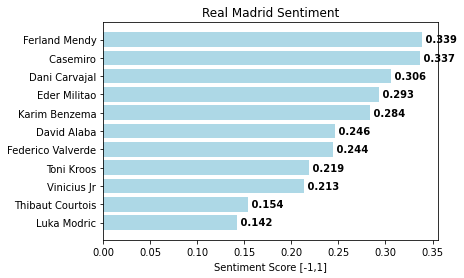

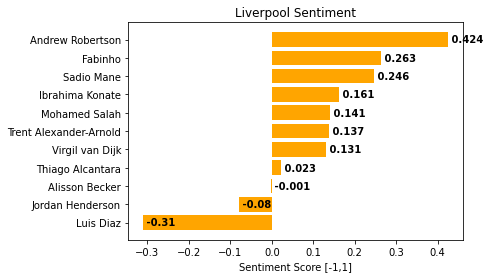

In [6]:
### sort each senitment array and organize for plotting

team1_player_sentiment.sort(key=sentiment_element)
team2_player_sentiment.sort(key=sentiment_element)

# create index for team 1
team1_Index = []
team1_Sentiment = []
for i in team1_player_sentiment:
    team1_Index.append(i[0])
    team1_Sentiment.append(round(i[1],3))

# create index for team 2
team2_Index = []
team2_Sentiment = []
for i in team2_player_sentiment:
    team2_Index.append(i[0])
    team2_Sentiment.append(round(i[1],3))


### create bar graphs for Part 1 displaying data and then save down

def plot_bar_team1_sentiment():
    fig, ax = plt.subplots()
    ax.barh(team1_Index, team1_Sentiment, color = "lightblue")
    plt.title(team1 + ' Sentiment')
    plt.xlabel('Sentiment Score [-1,1]')
    for i, v in enumerate(team1_Sentiment):
        ax.text(v, i, " " + str(v), color='black', va = 'center', fontweight='bold')
    plt.savefig('team1_sentiment.png')

plot_bar_team1_sentiment()

def plot_bar_team2_sentiment():
    fig, ax = plt.subplots()
    ax.barh(team2_Index, team2_Sentiment, color = "orange")
    plt.title(team2 + ' Sentiment')
    plt.xlabel('Sentiment Score [-1,1]')
    for i, v in enumerate(team2_Sentiment):
        ax.text(v, i, " " + str(v), color='black', va = 'center', fontweight='bold')
    plt.savefig('team2_sentiment.png')

plot_bar_team2_sentiment()

In [7]:
### display tweets for players interested in
## enter the team name as a string for the first argument, then the player number that you are intersted in
## will display the top 10 negative tweets and then the top 10 positive tweets

# team 1

display_tweets("",2)
display_tweets("",3)

# team 2

display_tweets("",3)
display_tweets("",8)

[['RT @Lea_EFC: Trent Alexander Arnold’s poor defending costs Liverpool the Champions League.\n\nWorld class my arse.', -0.4], ['fuck liverpool but ashito aoi is basically trent alexander arnold', -0.4], ['RT @Lea_EFC: Trent Alexander Arnold’s poor defending costs Liverpool the Champions League.\n\nWorld class my arse.', -0.4], ['RT @Lea_EFC: Trent Alexander Arnold’s poor defending costs Liverpool the Champions League.\n\nWorld class my arse.', -0.4], ['RT @Lea_EFC: Trent Alexander Arnold’s poor defending costs Liverpool the Champions League.\n\nWorld class my arse.', -0.4], ["Sad how success has gone to Trent Alexander-Arnold's head. The telltale sign is always when they start putting more… https://t.co/DE0MBm4qV9", -0.1], ['Trent Alexander-Arnold, my man. Taylor Hinds is right there on the bus behind you. Shoot your shot. Give us Liverpool babies.', -0.05714285714285716], ['RT @BradJCox_: Trent Alexander-Arnold said yesterday that Vinicius is a fantastic player to watch. Unfortunatel

In [8]:
### implementiation for specific terms relating to the game, ranking for BM25Okapi

positive_terms = "assist good excellent great" # search queries, positive terms
negative_terms = "poor bad miss own awful" # negative terms

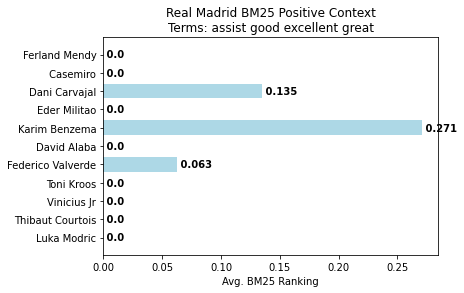

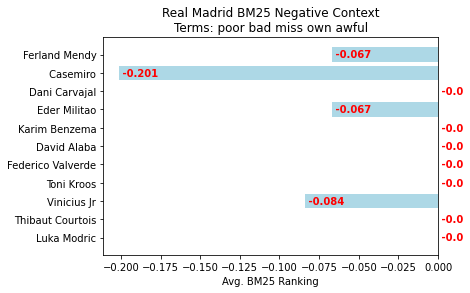

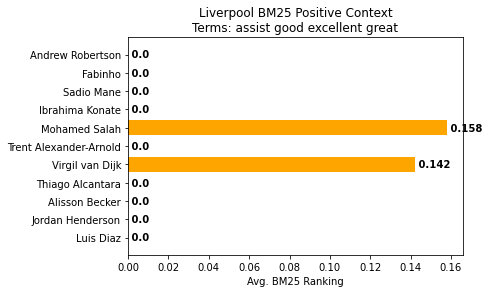

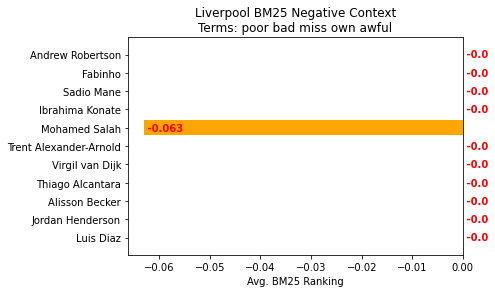

In [9]:
### implementation of BM25Okapi to rank relevant of tweets in relation the game

def rank_scores(corpus, terms): # give each tweet a score based on query
    bm25 = BM25Okapi(corpus)
    tweet_scores = bm25.get_scores(terms)
    return tweet_scores

def rank_top(corpus, terms): # show the top 10 based on query
    bm25 = BM25Okapi(corpus)
    top_10_tweets = bm25.get_top_n(terms, corpus, n=10)
    return top_10_tweets


### sentiment in relation to using BM25 as context

team1_total_tweets = []
team2_total_tweets = []
team1_positive_results = []
team2_positive_results = []
team1_negative_results = []
team2_negative_results = []

for i in range(0,len(team1_player_tweets)):
    team1_total_tweets = team1_total_tweets + team1_player_tweets[i] # combine all player tweets into one corpus
    team2_total_tweets = team2_total_tweets + team2_player_tweets[i]
total_tweets = team1_total_tweets + team2_total_tweets # combine both player tweets into one corpus
tokenized_tweets = [doc.split(" ") for doc in total_tweets] # tokenize the tweets for function

tokenized_query_positive = positive_terms.split(" ")
tokenized_query_negative = negative_terms.split(" ")

# positive array
positive_array = rank_scores(tokenized_tweets,tokenized_query_positive)
team1_positive_array = positive_array[0:number_of_tweets*total_players] # break into positive array for the two teams for sum
team2_positive_array = positive_array[number_of_tweets*total_players:len(positive_array)]

# negative array
negative_array = rank_scores(tokenized_tweets,tokenized_query_negative)
team1_negative_array = negative_array[0:number_of_tweets*total_players] # break into positive array for the two teams for sum
team2_negative_array = negative_array[number_of_tweets*total_players:len(negative_array)]

# postive tweets
team1_positive_results = np.sum(np.resize(team1_positive_array,(total_players,number_of_tweets)),axis=1) / number_of_tweets
team2_positive_results = np.sum(np.resize(team2_positive_array,(total_players,number_of_tweets)),axis=1) / number_of_tweets

# negative tweets
team1_negative_results = np.sum(np.resize(team1_negative_array,(total_players,number_of_tweets)),axis=1) / -number_of_tweets
team2_negative_results = np.sum(np.resize(team2_negative_array,(total_players,number_of_tweets)),axis=1) / -number_of_tweets

### create bar graphs for Part 2 displaying data and then save down


# reshape sum arrays for graphing

team1_positive_results = np.round(np.resize(team1_positive_results,(1,total_players)).tolist(),3)
team2_positive_results = np.round(np.resize(team2_positive_results,(1,total_players)).tolist(),3)
team1_negative_results = np.round(np.resize(team1_negative_results,(1,total_players)).tolist(),3)
team2_negative_results = np.round(np.resize(team2_negative_results,(1,total_players)).tolist(),3)


# team 1 BM25 charts

def plot_bar_team1_BM25positive():
    fig, ax = plt.subplots()
    ax.barh(team1_Index, team1_positive_results[0], color = "lightblue")
    plt.title(team1 + ' BM25 Positive Context' + '\n' + "Terms: " + positive_terms)
    plt.xlabel('Avg. BM25 Ranking')
    for i, v in enumerate(team1_positive_results[0]):
        ax.text(v, i, " " + str(v), color='black', va = 'center', fontweight='bold')
    plt.savefig('team1_BM25positive.png')

plot_bar_team1_BM25positive()

def plot_bar_team1_BM25negative():
    fig, ax = plt.subplots()
    ax.barh(team1_Index, team1_negative_results[0], color = "lightblue")
    plt.title(team1 + ' BM25 Negative Context' + '\n' + "Terms: " + negative_terms)
    plt.xlabel('Avg. BM25 Ranking')
    for i, v in enumerate(team1_negative_results[0]):
        ax.text(v, i, " " + str(v), color='red', va = 'center', fontweight='bold')
    plt.savefig('team1_BM25negative.png')

plot_bar_team1_BM25negative()


# team 2 BM25 charts

def plot_bar_team2_BM25positive():
    fig, ax = plt.subplots()
    ax.barh(team2_Index, team2_positive_results[0], color = "orange")
    plt.title(team2 + ' BM25 Positive Context' + '\n' + "Terms: " + positive_terms)
    plt.xlabel('Avg. BM25 Ranking')
    for i, v in enumerate(team2_positive_results[0]):
        ax.text(v, i, " " + str(v), color='black', va = 'center', fontweight='bold')
    plt.savefig('team2_BM25positive.png')

plot_bar_team2_BM25positive()

def plot_bar_team2_BM25negative():
    fig, ax = plt.subplots()
    ax.barh(team2_Index, team2_negative_results[0], color = "orange")
    plt.title(team2 + ' BM25 Negative Context' + '\n' + "Terms: " + negative_terms)
    plt.xlabel('Avg. BM25 Ranking')
    for i, v in enumerate(team2_negative_results[0]):
        ax.text(v, i, " " + str(v), color='red', va = 'center', fontweight='bold')
    plt.savefig('team2_BM25negative.png')

plot_bar_team2_BM25negative()

In [10]:
### display the top search tweets for each sentiment for each team

rank_top(team1_total_tweets,positive_terms) # search for top positive tweets for team 1
#rank_top(team1_total_tweets,negative_terms) # search for top negative tweets for team 1
#rank_top(team2_total_tweets,positive_terms) # search for top positive tweets for team 2
#rank_top(team2_total_tweets,negative_terms) # search for top negative tweets for team 2

['YouTube boxer Paul congratulated close friend Vinicius Jr for his game winning goal in the Champions League final d… https://t.co/VxHSEwX0o1',
 'How are real madrid going to lineup next season?\nThey have like 7 good midfielders (tchouameni,kroos,modric,casemir… https://t.co/acoQOZXQhF',
 'RT @TimesLIVE: Vinicius Jr crowned his breakout season by scoring the goal that won Real Madrid a record-extending 14th European Cup title…',
 'Vinicius Jr crowned his breakout season by scoring the goal that won Real Madrid a record-extending 14th European C… https://t.co/dHV4oLF9vF',
 'Vinicius Jr crowned his breakout season by scoring the goal that won Real Madrid a record-extending 14th European C… https://t.co/U38KKqj7mT',
 'RT @Loconteee: The way how David Alaba has slotted into Real Madrid is something that nobody expected.\n\nNot only that he’s such a loved fig…',
 'RT @Loconteee: The way how David Alaba has slotted into Real Madrid is something that nobody expected.\n\nNot only that he’s s